<a id='top'> </a> <br>
## Content
1. [Load packages](#1)
2. [Overview of DataSets](#2)
3. [Data Cleaning](#3)
4. [Data Prepratation](#4)
5. [Data Visualization](#5)
6. [Training the model](#6)
7. [Prediction](#7)

       

<a id=1></p><br>
# Load packages

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack, csr_matrix
from textblob import TextBlob
import nltk
import re
import datetime
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVR
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
#from wordcloud import WordCloud, STOPWORDS 

%matplotlib inline

<a id=1></p><br>
# Overview of Dataset

In [2]:
df1=pd.read_csv('train_file.csv')
df2=pd.read_csv('test_file.csv')
#reading the train and test dataset
test_id = ['IDLink']

## Exploring the data

In [3]:
df1.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [4]:
df1.tail()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
55927,jQ3CeLRCb9,Fidel Castro Lashes Out at Obama After Cuba Visit,Retired Cuban leader Fidel Castro slammed Pres...,Wall Street Journal,obama,2016-03-29 01:35:06,794,10,5,-0.135417,-0.055902
55928,akNYeJ8opY,JOHN CRISP | Obama's strategic reaction to Bru...,President Obama caught some predictable flak f...,Kitsap Sun,obama,2016-03-29 01:35:08,0,0,0,0.236228,0.056110
55929,n2DGs0c8IG,Think Trump's 45 Percent Tariffs Are Bad? Try ...,While Trump wants to put large tariffs on impo...,Huffington Post,obama,2016-03-29 01:35:09,102,4,0,0.025747,0.114820
55930,P0EBiaSEjq,Microsoft finally releases giant Surface,Microsoft’s business customers are finally beg...,TechEye,microsoft,2016-03-29 01:38:00,0,0,0,0.000000,-0.028296
55931,99MLvyAQTJ,Rays of sunshine in the US economy,AS WE all know from listening to the campaign ...,Washington Post,economy,2016-03-29 01:41:08,75,7,19,0.000000,0.184444


In [5]:
df2.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [6]:
df2.tail()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
37283,5bYaKaEyN3,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,-1,3,5
37284,jmnC32Uh5u,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,-1,0,1
37285,yPhgBwobV0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,5,1,0
37286,adFcODOaiQ,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0,0,0
37287,y3DArgHOmr,Sausalito businesswoman wins $10000 in Microso...,"Goldstein, the proprietor of the TG Travel Gro...",East Bay Times,microsoft,2016-07-07 16:16:11,-1,1,0


In [7]:
df1.shape

(55932, 11)

In [8]:
df2.shape

(37288, 9)

In [9]:
#from df1.shape and df2.shape we get to know that there are total
#55932 rows and 11 columns in both datasets

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
IDLink               55932 non-null object
Title                55932 non-null object
Headline             55932 non-null object
Source               55757 non-null object
Topic                55932 non-null object
PublishDate          55932 non-null object
Facebook             55932 non-null int64
GooglePlus           55932 non-null int64
LinkedIn             55932 non-null int64
SentimentTitle       55932 non-null float64
SentimentHeadline    55932 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37288 entries, 0 to 37287
Data columns (total 9 columns):
IDLink         37288 non-null object
Title          37288 non-null object
Headline       37288 non-null object
Source         37187 non-null object
Topic          37288 non-null object
PublishDate    37288 non-null object
Facebook       37288 non-null int64
GooglePlus     37288 non-null int64
LinkedIn       37288 non-null int64
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [12]:
#df1.info() gives information about the datasets

## Find missing values

In [13]:
df1.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

In [14]:
df2.isnull().sum()

IDLink           0
Title            0
Headline         0
Source         101
Topic            0
PublishDate      0
Facebook         0
GooglePlus       0
LinkedIn         0
dtype: int64

In [15]:
# we get to know that both datasets have 175 null values in 'Source' column.

In [16]:
df1['Source'].value_counts()[:5]
#finds the count of unique values in the dataset

Bloomberg         992
Reuters           763
ABC News          645
New York Times    573
The Guardian      551
Name: Source, dtype: int64

In [17]:
df2['Source'].value_counts()[:5]

Bloomberg          740
Reuters            558
ABC News           453
New York Times     419
MSPoweruser.com    416
Name: Source, dtype: int64

In [18]:
df1['Source']=df1['Source'].fillna('Bloomberg')
df2['Source']=df2['Source'].fillna('Bloomberg')
#this will fill the missing values with the values of Bloomberg

<a id=3></p><br>
# Data Cleaning

In [19]:
nltk.download('stopwords') #download stopswords
nltk.download('punkt') #divide text into sentences
nltk.download('wordnet') #lexical database to find meaning of word

s = set(stopwords.words('english')) #store the stop words

def cleanset(text):
  text_token = word_tokenize(text)
  filtered_text = ' '.join([w.lower() for w in text_token if w.lower() not in s and len(w) > 2])
  filtered_text = filtered_text.replace(r"[^a-zA-Z]+", '')
  text_only = re.sub(r'\b\d+\b', '', filtered_text)
  clean_text = text_only.replace(',', '').replace('.', '').replace(':', '')
  return clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Praffulla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Praffulla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Praffulla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df1['Text_Title'] = df1['Title'] + ' ' + df1['Source'] + ' ' + df1['Topic']
df2['Text_Title'] = df2['Title'] + ' ' + df2['Source'] + ' ' + df2['Topic']

In [21]:
df1['Text_Headline'] = df1['Headline'] + ' ' + df1['Source'] + ' ' + df1['Topic']
df2['Text_Headline'] = df2['Headline'] + ' ' + df2['Source'] + ' ' + df2['Topic']

In [22]:
df1['Text_Title'][0]
df1['Text_Headline'][0]

'Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor USA TODAY obama'

### Cleaning the 'Text_Title'

In [23]:
df1['Text_Title'] = [cleanset(x) for x in df1['Text_Title']]
df2['Text_Title'] = [cleanset(x) for x in df2['Text_Title']]

### Clean the 'Text_Headline'

In [24]:
df1['Text_Headline'] = [cleanset(x) for x in df1['Text_Headline']]
df2['Text_Headline'] = [cleanset(x) for x in df2['Text_Headline']]

In [25]:
df1['Text_Title'][0]
df1['Text_Headline'][0]

'obama lays wreath arlington national cemetery president barack obama laid wreath tomb unknowns honor usa today obama'

<a id=4></p><br>
# Data Prepration

### Feature Extraction

In [26]:
v = TfidfVectorizer(use_idf=True)
df1_v_Title = v.fit_transform(df1['Text_Title'])
df2_v_Title = v.transform(df2['Text_Title'])

In [27]:
v_ = TfidfVectorizer()
df1_v_Headline = v_.fit_transform(df1['Text_Headline'])
df2_v_Headline = v_.transform(df2['Text_Headline'])

In [28]:
svd = TruncatedSVD(n_components=20)
df1_v_Title = svd.fit_transform(df1_v_Title)
df2_v_Title = svd.transform(df2_v_Title)
df1_v_Headline = svd.fit_transform(df1_v_Headline)
df2_v_Headline = svd.transform(df2_v_Headline)

In [29]:
df1['p_t'] = df1['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2['p_t'] = df2['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1['sub_t'] = df1['Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df2['sub_t'] = df2['Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df1['p_h'] = df1['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2['p_h'] = df2['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1['sub_h'] = df1['Headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df2['sub_h'] = df2['Headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
# Calculating the sentiment and storing the values in p_t for polarity and sub_t to store the subjectivity value

### Handle Categorical Values

In [30]:
enc = LabelEncoder()
df1['Topic'] = enc.fit_transform(df1['Topic'])
df2['Topic'] = enc.transform(df2['Topic'])
total = df1['Source'].to_list() + df2['Source'].to_list()
total = enc.fit_transform(total)
df1['Source'] = enc.transform(df1['Source'])
df2['Source'] = enc.transform(df2['Source'])

In [31]:
df1_weekday = []
df2_weekday = []

for i in df1['PublishDate']:
    df1_weekday.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%A"))
    
for i in df2['PublishDate']:
    df2_weekday.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%A"))

df1['weekday'] = df1_weekday
df2['weekday'] = df2_weekday
df1['weekday'] = df2['weekday'].map({'Monday': 0,'Tuesday': 1,'Wednesday': 2,'Thursday': 3,'Friday': 4,'Saturday': 5,'Sunday': 6})
df2['weekday'] = df2['weekday'].map({'Monday': 0,'Tuesday': 1,'Wednesday': 2,'Thursday': 3,'Friday': 4,'Saturday': 5,'Sunday': 6})

In [32]:
df1["hour"] = df1["PublishDate"].apply(lambda x: x.split()[1].split(':')[0])
df2["hour"] = df2["PublishDate"].apply(lambda x: x.split()[1].split(':')[0])
# Get hour from date

<a id=5></p><br>
# Data Visualization

In [33]:
import seaborn as sns

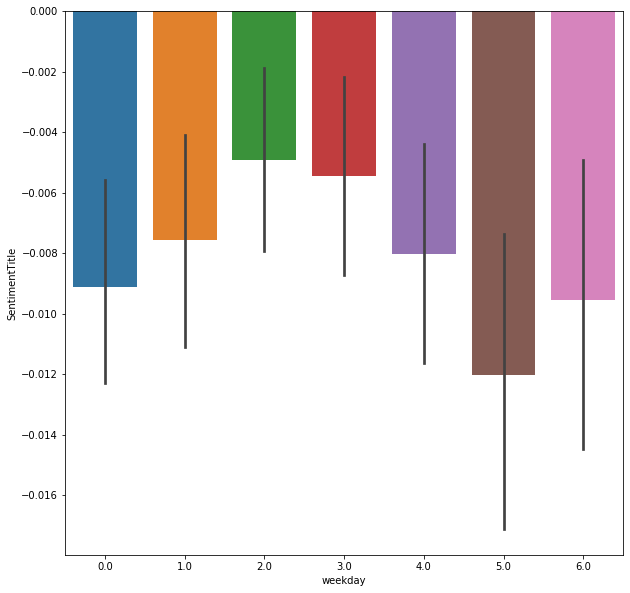

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(x='weekday',y='SentimentTitle',data=df1)

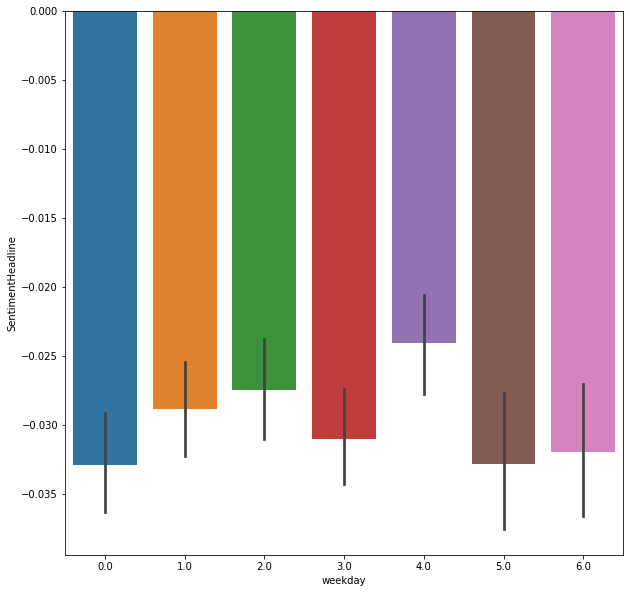

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(x='weekday',y='SentimentHeadline',data=df1)

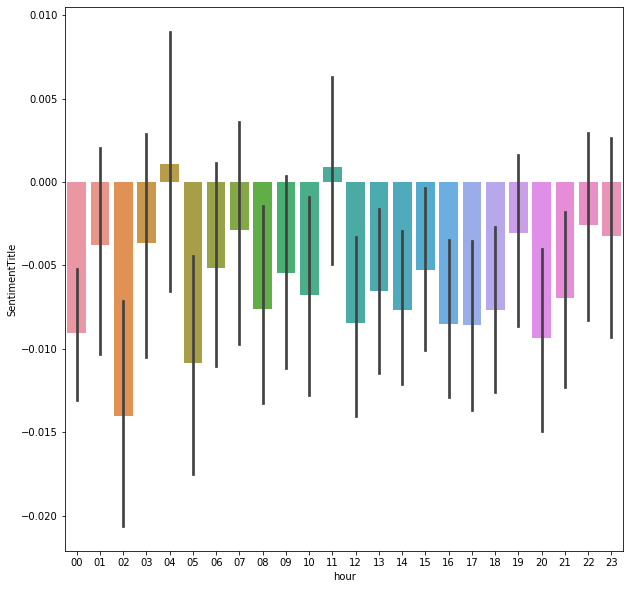

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(x='hour',y='SentimentTitle',data=df1)

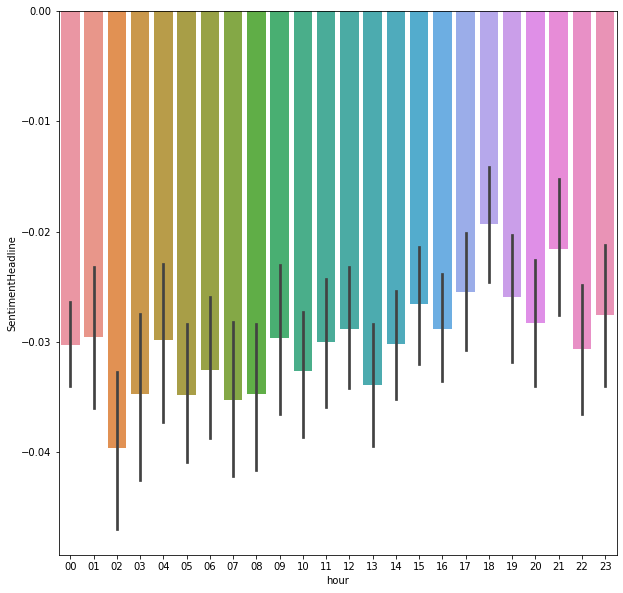

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(x='hour',y='SentimentHeadline',data=df1)

### Finding number of words,character, unique words nad average length in Title and Head Line

In [45]:
df1["words_t"]=df1["Text_Title"].apply(lambda x: len(str(x).split()))
df2["words_t"]=df2["Text_Title"].apply(lambda x: len(str(x).split()))
df1["char_t"]=df1["Text_Title"].apply(lambda x: len(str(x)))
df2["char_t"]=df2["Text_Title"].apply(lambda x: len(str(x)))
df1["uwords_t"]=df1["Text_Title"].apply(lambda x: len(set(str(x).split())))
df2["uwords_t"]=df2["Text_Title"].apply(lambda x: len(set(str(x).split())))
df1["m_t"]=df1["Text_Title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df2["m_t"]=df2["Text_Title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [39]:
df1["words_h"]=df1["Text_Headline"].apply(lambda x: len(str(x).split()))
df2["words_h"]=df2["Text_Headline"].apply(lambda x: len(str(x).split()))
df1["char_h"]=df1["Text_Headline"].apply(lambda x: len(str(x)))
df2["char_h"]=df2["Text_Headline"].apply(lambda x: len(str(x)))
df1["uwords_h"]=df1["Text_Headline"].apply(lambda x: len(set(str(x).split())))
df2["uwords_h"]=df2["Text_Headline"].apply(lambda x: len(set(str(x).split())))
df1["m_h"] = df1["Text_Headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df2["m_h"] = df2["Text_Headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [40]:
sc = StandardScaler()
colm = ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'words_t', 'uwords_t', 'char_t', 'm_t',
        'words_h', 'uwords_h', 'char_h', 'm_h', 'hour', 'weekday']

for col in colm:
  df1[col] = sc.fit_transform(df1[col].values.reshape(-1, 1))
  df2[col] = sc.transform(df2[col].values.reshape(-1, 1))

C:\Program Files (x86)\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarni

In [41]:
colm_t = ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'words_t', 'uwords_t', 'char_t', 'm_t', 'p_t', 'sub_t', 'hour', 'weekday']
df1_1 = df1[colm_t]
df2_1 = df2[colm_t]
colm_h = ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'words_h', 'uwords_h', 'char_h', 'm_h', 'p_h', 'sub_h', 'hour', 'weekday']
df1_2 = df1[colm_h]
df2_2 = df2[colm_h]

In [42]:
df1_1.head()

,Source,Topic,Facebook,GooglePlus,LinkedIn,words_t,uwords_t,char_t,m_t,p_t,sub_t,hour,weekday
0,1.257700,0.841443,-0.184044,-0.262649,-0.199608,-0.259144,-0.304659,-0.572668,-0.612899,0.0,0.0,-1.699073,-0.840468
1,-1.314091,-1.108773,-0.184044,-0.262649,-0.199608,-1.668699,-1.721681,-1.629548,0.274497,0.0,0.0,-1.699073,-0.840468
2,-1.314091,-1.108773,-0.184044,-0.262649,-0.199608,-1.198848,-1.249340,-1.035053,0.328828,0.0,0.0,-1.699073,-0.840468
3,0.468412,-1.108773,-0.184044,-0.262649,-0.199608,-1.668699,-1.249340,-2.224043,-1.436911,0.0,0.0,-1.699073,-0.840468
4,1.029071,-1.108773,-0.184044,-0.262649,-0.199608,1.150411,1.112364,1.012652,-0.295972,0.0,0.0,-1.699073,-0.840468


In [43]:
df1_2.head()

,Source,Topic,Facebook,GooglePlus,LinkedIn,words_h,uwords_h,char_h,m_h,p_h,sub_h,hour,weekday
0,1.257700,0.841443,-0.184044,-0.262649,-0.199608,-0.285943,-0.526753,-0.490533,-1.058531,0.000000,0.000000,-1.699073,-0.840468
1,-1.314091,-1.108773,-0.184044,-0.262649,-0.199608,-0.285943,-0.232503,-0.317671,-0.175891,0.100000,0.200000,-1.699073,-0.840468
2,-1.314091,-1.108773,-0.184044,-0.262649,-0.199608,-0.413305,-0.673878,-0.300385,0.618485,0.000000,0.041667,-1.699073,-0.840468
3,0.468412,-1.108773,-0.184044,-0.262649,-0.199608,0.096143,0.061747,0.304632,0.843558,-0.166667,0.166667,-1.699073,-0.840468
4,1.029071,-1.108773,-0.184044,-0.262649,-0.199608,0.223505,0.208872,0.391063,0.618485,0.133333,0.380556,-1.699073,-0.840468


In [1]:
df1_X_Title = hstack([df1_v_Title, csr_matrix(df1_1.values)])
df2_X_Title = hstack([df2_v_Title, csr_matrix(df2_1.values)])
y1 = df1['SentimentTitle']

df1_X_Headline = hstack([df1_v_Headline, csr_matrix(df1_2.values)])
df2_X_Headline = hstack([df2_v_Headline, csr_matrix(df2_2.values)])
y2 = df1['SentimentHeadline']

NameError: name 'hstack' is not defined

<a id=6></p><br>
# Training the model

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df1_X_Title, y1, test_size=0.20, random_state=42)

clf1 = LinearSVR(C=0.2)
clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
mae1 = mean_absolute_error(y_pred1, y_test)
print('Mean Abosulte Error=', 1 - mae1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1_X_Headline, y2, test_size=0.20, random_state=42)

clf2 = LinearSVR(C=0.1)
clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)
mae2 = mean_absolute_error(y_pred2, y_test)
print('Mean Absoulte Error=', 1 - mae2)

In [ ]:
print('Mean Absolute Erro=', 1 - ((0.4 * mae1) + (0.6 * mae2)))

<a id=7></p><br>
# Prediction

In [ ]:
title = clf1.predict(df2_X_Title)
headline = clf2.predict(df2_X_Headline)

In [ ]:
df3 = pd.DataFrame()
df3['IDLink'] = test_id
df3['SentimentTitle'] = title
df3['SentimentHeadline'] = headline
df3.to_csv('submit_1.csv')